# Я первый раз делал работу не на платформе,а на локальном пк.Если что-то неправильно по поводу выгрузки,напишите,пожалуйста.

Привет, меня зовут Артем. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='green'><b>Полезные (и просто интересные) материалы:</b></font> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 

<font color='green'>Пример BERT с GPU:
```python
%%time
from tqdm import notebook
batch_size = 2 # для примера возьмем такой батч, где будет всего две строки датасета
embeddings = [] 
for i in notebook.tqdm(range(input_ids.shape[0] // batch_size)):
        batch = torch.LongTensor(input_ids[batch_size*i:batch_size*(i+1)]).cuda() # закидываем тензор на GPU
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()
        
        with torch.no_grad():
            model.cuda()
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на проц, чтобы в нумпай кинуть
        del batch
        del attention_mask_batch
        del batch_embeddings
        
features = np.concatenate(embeddings) 
```
Можно сделать предварительную проверку на наличие GPU.\
Например, так: ```device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")```\
Тогда вместо .cuda() нужно писать .to(device)

Если понравилась работа с текстами, то можешь посмотреть очень интересный (но очень-очень сложный) курс лекций: https://github.com/yandexdataschool/nlp_course .
</font>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Радует, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Отлично, что стоп-слова были исключены!
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Приятно видеть содержательный вывод в конце проекта!
* Удачи в дальнейшем обучении и следующих работах!

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

**Цель проекта:**

Постройте модель со значением метрики качества *F1* не меньше 0.75 для классификации комментарией на позитивные и негативные.

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.


**Ход работы:**

- Загрузка данных:загрузка и изучение общей информации из предоставленных датасетов.

- Предобработка данных:обработка данных,изучение основных параметров признаков,их распределения.

- Обучение моделей:формирование и нахождение лучшей модели МО.

- Анализ моделей:сравнение лучших моделей по видам и их анализ.

**Общий вывод:** резюмирование полученных результатов,формулировка ключевых выводов и рекомендаций.

##  Загрузка данных

###  Импортируем библиотеки:

In [1]:
!pip install optuna.integration -q 

In [2]:
import pandas as pd
import nltk
import optuna
import re
from nltk.corpus import stopwords as nltk_stopwords,wordnet
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.stem import WordNetLemmatizer


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier



from optuna.integration import OptunaSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score


from optuna import distributions




nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_da

True

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

### Запишем csv-файл в переменную:

In [3]:
df_toxic_comments = pd.read_csv('toxic_comments.csv')

### Выведем на экран первые 10 строк датафрейма df_toxic_comments  и общую информацию по нему:

In [4]:
display(df_toxic_comments.head(10))
df_toxic_comments.info()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0
5,5,"""\n\nCongratulations from me as well, use the ...",0
6,6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,7,Your vandalism to the Matt Shirvington article...,0
8,8,Sorry if the word 'nonsense' was offensive to ...,0
9,9,alignment on this subject and which are contra...,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


Вывод:как видно из результатов,в датафрейме отсутствуют пропуски,столбцы имеют корректный тип данных,наименования столбцов соответствуют стандарту PEP 8,потенциально нужно удалить столбец "Unnamed: 0."

##  Предобработка данных

###  Удаление столбца 'Unnamed: 0':

Можно предположить ,что данный столбец может являться столбцом со старыми индексами датафрейма.Удалим его:

In [5]:
df_toxic_comments = df_toxic_comments.drop('Unnamed: 0',axis = 1 )

###  Проверка датафрейма df_toxic_comments на наличие явных дубликатов:

In [6]:
display(df_toxic_comments.duplicated().sum())

np.int64(0)

###  Проверка датафрейма df_toxic_comments на наличие аномалий:

Выведем кол-во строк,в которых встречаются буквы латинского алфавита:

In [7]:
count_lowercase = df_toxic_comments['text'].str.contains(r'[A-Za-z]', regex=True).sum()
print(f"Количество строк с строчными буквами: {count_lowercase}")

Количество строк с строчными буквами: 159281


Уже по предварительному просмотру первых 10 строк датафрейма было замечено,что имеются строки написаные только в верхнем регистре.Так как при векторизации текстов одни и те же слова,написанные в верхнем и нижнем регистре считаются разными,приведем все к нижнем регистру:

In [8]:
df_toxic_comments = df_toxic_comments[df_toxic_comments['text'].str.contains(r'[A-Za-z]', regex=True)].reset_index(drop=True)
df_toxic_comments['text'] = df_toxic_comments['text'].str.lower()

###  Построим столбчатую диаграмму значений целевой переменной:

<Axes: xlabel='toxic'>

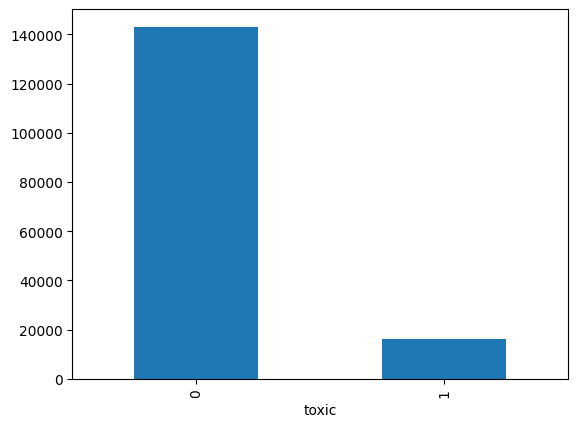

In [9]:
df_toxic_comments["toxic"].value_counts().plot(kind='bar')

Вывод:как видно из результатов,имеется четкий дисбаланс классов.Так как полноценно адекватно синтезировать текста для искусственного устранения дисбалансов мы не можем,ничего делать не будем.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корреткно. Радует, что баланс классов был изучен.
</div>

##  Обучение моделей

###  Формирование функции для очистки текста:

In [10]:
def clean_text(text):

    # Удаляем всё, кроме букв, цифр и пробелов
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Удаляем лишние пробелы
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


<div class="alert alert-block alert-success">
<b>Успех:</b> Очистка была сделана верно.
</div>

###  Формирование функции для лемматизации текста:

In [11]:
# инициализируем Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
# напишем функцию для pos-тегов - маркировки частей речи
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

###  Формирование итоговой функции для подготовки текста:

In [12]:
# напишем функцию для очистки и лемматизации текста с маркированными частями речи
def itog(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Приводим к нижнему регистру
    text = text.lower()
    # Удаляем лишние пробелы
    text = re.sub(r'\s+', ' ', text).strip()
    clear = text.split() 
    lemm = []
    # в цикле лемматизируем очищенный текст
    for i in range(len(clear)):
        lemm.append(lemmatizer.lemmatize(clear[i], get_wordnet_pos(clear[i])))
    return " ".join(lemm)





df_toxic_comments['lemmatized_text'] = df_toxic_comments['text'].apply(itog)

Выведем датафрейм после выполненной подготовки текста:

In [13]:
display(df_toxic_comments)

,text,toxic,lemmatized_text
0,explanation\nwhy the edits made under my usern...,0,explanation why the edits make under my userna...
1,d'aww! he matches this background colour i'm s...,0,daww he match this background colour im seemin...
2,"hey man, i'm really not trying to edit war. it...",0,hey man im really not try to edit war it just ...
3,"""\nmore\ni can't make any real suggestions on ...",0,more i cant make any real suggestion on improv...
4,"you, sir, are my hero. any chance you remember...",0,you sir be my hero any chance you remember wha...
...,...,...,...
159276,""":::::and for the second time of asking, when ...",0,and for the second time of ask when your view ...
159277,you should be ashamed of yourself \n\nthat is ...,0,you should be ashamed of yourself that be a ho...
159278,"spitzer \n\numm, theres no actual article for ...",0,spitzer umm there no actual article for prosti...
159279,and it looks like it was actually you who put ...,0,and it look like it be actually you who put on...


<div class="alert alert-block alert-success">
<b>Успех:</b> С лемматизацией тоже все ОК.
</div>

###  Создаем корпус текстов датафрейма df_toxic_comments:

In [14]:
corpus = df_toxic_comments['lemmatized_text']
stopwords = list(nltk_stopwords.words('english'))

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Приводить тексты к юникоду не имеет смысла, так как они все на английском. Это может привести к падению ядра из-за увеличения объема занимаемой памяти.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 

- Приведение к юникоду было убрано.

</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> ОК.
</div>

###  Создаем кастомный scorer для F1:

In [15]:
scorer = make_scorer(f1_score, average="binary")  # binary для 2 классов

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Векторизатор можно обучать только после разбиения выборки на части. При этом он должен быть обучен только на тренировочной части данных.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 

- Векторизация была реализована через пайплайн внутри Optuna.

</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Отлично!
</div>

###  Формирование тестовой и тренировочной выборок для метода TfidfVectorizer:

In [16]:
X = df_toxic_comments['lemmatized_text']
y = df_toxic_comments['toxic']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

### Формирование пайплана для модели LogisticRegression:

In [17]:
lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords)),
    ('model', LogisticRegression(random_state=42,penalty='l2', solver='saga',max_iter=1000))
])

### Формирование словаря  гиперпараметров для модели LogisticRegression:

In [18]:
# словарь для модели LogisticRegression()
param_grid_logisticregression = {'model__C': distributions.IntDistribution(1, 15)}

### 3.9 Создание и обучение модели OptunaSearchCV:

In [19]:
opt_lr = OptunaSearchCV(
        lr_pipeline,
        param_grid_logisticregression,
        cv=5,
        scoring=scorer,
        n_trials=3,
        error_score='raise',
        random_state=42,n_jobs=-1
    )
opt_lr.fit(X_train, y_train)

# выводим результат моделирования
print('Лучшая модель и её параметры:\n\n', opt_lr.best_estimator_) 
print ('Метрика лучшей модели на тренировочной выборке:', opt_lr.best_score_)


C:\Users\user\AppData\Local\Temp\ipykernel_10328\3209790101.py:1: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  opt_lr = OptunaSearchCV(
[I 2025-08-23 14:24:08,554] A new study created in memory with name: no-name-c2c6419b-923d-43a6-8145-5958fd73359a
[I 2025-08-23 14:25:29,269] Trial 1 finished with value: 0.7475377102369698 and parameters: {'model__C': 2}. Best is trial 1 with value: 0.7475377102369698.
[I 2025-08-23 14:25:34,509] Trial 0 finished with value: 0.761841853955939 and parameters: {'model__C': 4}. Best is trial 0 with value: 0.761841853955939.
[I 2025-08-23 14:25:39,776] Trial 2 finished with value: 0.7678031860695989 and parameters: {'model__C': 8}. Best is trial 2 with value: 0.7678031860695989.


Лучшая модель и её параметры:

 Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...])),
                ('model',
                 LogisticRegression(C=8, max_iter=1000, random_state=42,
                                    solver='saga'))])
Метрика лучшей модели на тренировочной выборке: 0.7678031860695989


Сформируем таблицу результатов моделей по значениям метрики:

In [20]:
display(opt_lr.trials_dataframe().sort_values('value',ascending=False).head(10)) 

,number,value,datetime_start,datetime_complete,duration,params_model__C,user_attrs_mean_fit_time,user_attrs_mean_score_time,user_attrs_mean_test_score,user_attrs_split0_test_score,user_attrs_split1_test_score,user_attrs_split2_test_score,user_attrs_split3_test_score,user_attrs_split4_test_score,user_attrs_std_fit_time,user_attrs_std_score_time,user_attrs_std_test_score,system_attrs_terminator:cv_scores,state
2,2,0.767803,2025-08-23 14:24:08.563002,2025-08-23 14:25:39.776800,0 days 00:01:31.213798,8,15.527481,2.600514,0.767803,0.777269,0.761187,0.768874,0.769337,0.762349,3.142542,0.904135,0.005773,"[0.7772685609532539, 0.7611869995289684, 0.768...",COMPLETE
0,0,0.761842,2025-08-23 14:24:08.556761,2025-08-23 14:25:34.509205,0 days 00:01:25.952444,4,14.046997,3.076573,0.761842,0.770381,0.760125,0.762959,0.761099,0.754645,2.371320,0.643580,0.005088,"[0.7703807521607101, 0.7601246105919003, 0.762...",COMPLETE
1,1,0.747538,2025-08-23 14:24:08.560146,2025-08-23 14:25:29.269500,0 days 00:01:20.709354,2,13.089017,2.926303,0.747538,0.760077,0.740084,0.747826,0.747348,0.742354,2.174258,1.041864,0.006925,"[0.7600767754318618, 0.7400837644740084, 0.747...",COMPLETE


<div class="alert alert-block alert-info">
<b>Совет: </b> Напомню, что внутри кросс-валидации происходит разбиение выборки на треин и валидацию. Однако, в таком случае векторизатор обучен на всей выборке, а это не совсем корректно. Для избежания такого эффекта можно использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">пайплайн</a> из векторизатора и модели. <a href="https://medium.com/analytics-vidhya/ml-pipelines-using-scikit-learn-and-gridsearchcv-fe605a7f9e05">Тут</a> есть пример.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 

- Векторизация была реализована через пайплайн внутри Optuna.

</div>

### Формирование пайплана для модели LGBMClassifier:

In [21]:
lgbmr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords)),
    ('model', LGBMClassifier(max_depth=6, num_leaves=31))
])

### Формирование словаря  гиперпараметров для модели LGBMClassifier:

In [22]:
# словарь для модели LGBMClassifier()
param_opt_lgbmr = { 
        'model__n_estimators': distributions.CategoricalDistribution([50,100]),
        'model__learning_rate': distributions.CategoricalDistribution([0.01,0.1,0.2]),
        'model__num_leaves': distributions.CategoricalDistribution([20,30])}


### Создание и обучение модели OptunaSearchCV:

In [23]:
opt_lgbmr = OptunaSearchCV(
        lgbmr_pipeline,
        param_opt_lgbmr,
        cv=5,
        scoring= scorer,
        n_trials=3,
        error_score='raise',n_jobs=-1)

opt_lgbmr.fit(X_train, y_train)
# выводим результат моделирования
print('Лучшая модель и её параметры:\n\n', opt_lgbmr.best_estimator_) 

C:\Users\user\AppData\Local\Temp\ipykernel_10328\4180083951.py:1: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  opt_lgbmr = OptunaSearchCV(
[I 2025-08-23 14:25:50,451] A new study created in memory with name: no-name-26d6e0d1-7d93-4674-80ce-cdb5099441e9
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Py

[LightGBM] [Info] Number of positive: 12139, number of negative: 107321
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.761741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 523791
[LightGBM] [Info] Number of data points in the train set: 119460, number of used features: 9725
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.101616 -> initscore=-2.179401
[LightGBM] [Info] Start training from score -2.179401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

Сформируем таблицу результатов моделей по значениям метрики:

In [24]:
display(opt_lgbmr.trials_dataframe().sort_values('value',ascending=False).head(10)) 

,number,value,datetime_start,datetime_complete,duration,params_model__learning_rate,params_model__n_estimators,params_model__num_leaves,user_attrs_mean_fit_time,user_attrs_mean_score_time,...,user_attrs_split0_test_score,user_attrs_split1_test_score,user_attrs_split2_test_score,user_attrs_split3_test_score,user_attrs_split4_test_score,user_attrs_std_fit_time,user_attrs_std_score_time,user_attrs_std_test_score,system_attrs_terminator:cv_scores,state
2,2,0.705576,2025-08-23 14:25:50.460525,2025-08-23 14:28:52.938330,0 days 00:03:02.477805,0.2,100,20,31.809333,4.500346,...,0.714573,0.698388,0.701960,0.713061,0.699898,4.316989,1.570363,0.006840,"[0.714572864321608, 0.6983883346124329, 0.7019...",COMPLETE
1,1,0.600389,2025-08-23 14:25:50.457038,2025-08-23 14:28:47.958459,0 days 00:02:57.501421,0.1,50,20,32.784141,2.635530,...,0.600844,0.599262,0.601351,0.604612,0.595877,1.438682,0.485903,0.002849,"[0.60084388185654, 0.599261573416643, 0.601351...",COMPLETE
0,0,0.597975,2025-08-23 14:25:50.453751,2025-08-23 14:28:50.214796,0 days 00:02:59.761045,0.1,50,30,32.753666,3.064985,...,0.597746,0.598636,0.596779,0.602029,0.594686,2.066140,0.848867,0.002415,"[0.5977464788732394, 0.5986355884025014, 0.596...",COMPLETE


### Формирование пайплана для модели DecisionTreeClassifier:

In [25]:
dt_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords)),
    ('model', DecisionTreeClassifier(random_state=42))
])

### Формирование словаря  гиперпараметров для модели DecisionTreeClassifier:

In [26]:
  # словарь для модели DecisionTreeClassifier()
param_opt_decisiontreeclassifier = {
        'model__max_depth': distributions.IntDistribution(2, 20),
        'model__min_samples_split': distributions.IntDistribution(2, 8),
        'model__min_samples_leaf': distributions.IntDistribution(1, 8)}

### Создание и обучение модели OptunaSearchCV:

In [27]:
opt_dt = OptunaSearchCV(
        dt_pipeline,
        param_opt_decisiontreeclassifier,
        cv=3,
        scoring=scorer,
        n_trials=3,
        error_score='raise',
        random_state=42
    )
opt_dt.fit(X_train, y_train)

# выводим результат моделирования
print('Лучшая модель и её параметры:\n\n', opt_dt.best_estimator_) 
print ('Метрика лучшей модели на тренировочной выборке:', opt_dt.best_score_)

C:\Users\user\AppData\Local\Temp\ipykernel_10328\2435260170.py:1: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  opt_dt = OptunaSearchCV(
[I 2025-08-23 14:29:12,196] A new study created in memory with name: no-name-f7eb47ac-2391-4ac6-a769-977fe7f394ab
[I 2025-08-23 14:29:42,791] Trial 0 finished with value: 0.5995484263760426 and parameters: {'model__max_depth': 10, 'model__min_samples_split': 7, 'model__min_samples_leaf': 1}. Best is trial 0 with value: 0.5995484263760426.
[I 2025-08-23 14:30:10,261] Trial 1 finished with value: 0.5778093800030727 and parameters: {'model__max_depth': 8, 'model__min_samples_split': 5, 'model__min_samples_leaf': 3}. Best is trial 0 with value: 0.5995484263760426.
[I 2025-08-23 14:30:34,758] Trial 2 finished with value: 0.5530776248018018 and parameters: {'model__max_depth': 6, 'model__min_samples_split': 3, 'model__min_samples_leaf': 2}. Best is trial 0 with value: 0.59954842637604

Лучшая модель и её параметры:

 Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...])),
                ('model',
                 DecisionTreeClassifier(max_depth=10, min_samples_split=7,
                                        random_state=42))])
Метрика лучшей модели на тренировочной выборке: 0.5995484263760426


Сформируем таблицу результатов моделей по значениям метрики:

In [28]:
display(opt_dt.trials_dataframe().sort_values('value',ascending=False).head(10)) 

,number,value,datetime_start,datetime_complete,duration,params_model__max_depth,params_model__min_samples_leaf,params_model__min_samples_split,user_attrs_mean_fit_time,user_attrs_mean_score_time,user_attrs_mean_test_score,user_attrs_split0_test_score,user_attrs_split1_test_score,user_attrs_split2_test_score,user_attrs_std_fit_time,user_attrs_std_score_time,user_attrs_std_test_score,system_attrs_terminator:cv_scores,state
0,0,0.599548,2025-08-23 14:29:12.197580,2025-08-23 14:29:42.791640,0 days 00:00:30.594060,10,1,7,8.454212,1.724177,0.599548,0.609596,0.601284,0.587766,0.085778,0.010981,0.008996,"[0.6095957936247125, 0.6012835280566069, 0.587...",COMPLETE
1,1,0.577809,2025-08-23 14:29:42.792696,2025-08-23 14:30:10.261421,0 days 00:00:27.468725,8,3,5,7.436753,1.699775,0.577809,0.584202,0.576604,0.572622,0.105095,0.012676,0.004803,"[0.5842016806722689, 0.5766040291179956, 0.572...",COMPLETE
2,2,0.553078,2025-08-23 14:30:10.262330,2025-08-23 14:30:34.758259,0 days 00:00:24.495929,6,2,3,6.454217,1.691431,0.553078,0.560246,0.552469,0.546518,0.050492,0.006175,0.005621,"[0.5602461117757648, 0.5524691358024691, 0.546...",COMPLETE


## Анализ моделей

### Выделение лучшей модели LogisticRegression:

In [29]:
df_lr = pd.DataFrame(opt_lr.cv_results_).sort_values('mean_test_score',ascending = False).head(1)

###  Выделение лучшей модели LGBMClassifier:

In [30]:
df_lgbmr = pd.DataFrame(opt_lgbmr.cv_results_).sort_values('mean_test_score',ascending = False).head(1)

### Выделение лучшей модели DecisionTreeClassifier:

In [31]:
df_dt = pd.DataFrame(opt_dt.cv_results_).sort_values('mean_test_score',ascending = False).head(1)

### Формирование итоговой таблицы для сравнения моделей:

Сформируем таблицу со значениями лучших моделей:

In [32]:
data = pd.concat([df_lr, df_lgbmr, df_dt], axis=0)

data.index = ['LogisticRegression', 'LGBMClassifier', 'DecisionTreeClassifier']
data['mean_test_score'] = data['mean_test_score']
data= data.drop(['split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score'],axis = 1)

In [33]:
display(data)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score
LogisticRegression,15.527481,3.142542,2.600514,0.904135,0.767803,0.005773
LGBMClassifier,31.809333,4.316989,4.500346,1.570363,0.705576,0.006840
DecisionTreeClassifier,8.454212,0.085778,1.724177,0.010981,0.599548,0.008996


Вывод:как видно из результатов,лучшей по ключевой метрике оказалась модель LogisticRegression.Выберем ее.

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что попробовал разные модели в этом шаге!
</div>

###   Расчет метрики  и анализ лучшей модели на тестовых данных 

Сформируем и сохраним предсказания на тестовой выборке по параметрам лучшей  модели :

In [34]:
estimator_lr = opt_lr.best_estimator_
estimator_lr.fit(X_train, y_train)
preds_lr = estimator_lr.predict(X_test)

Расчитаем метрику F1 для тестовых данных по параметрам лучшей модели:

In [35]:
print("F1_best_model:", f1_score(y_test,preds_lr))

F1_best_model: 0.7674937273487594


Вывод:как видно из результатов,значение метрики больше 0.75,а значит модель соответствует требованиям ТЗ.

<div class="alert alert-block alert-success">
<b>Успех:</b> Тестирование было сделано корректно.
</div>

## Общий вывод

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

**Цель проекта:**

Постройте модель со значением метрики качества *F1* не меньше 0.75 для классификации комментарией на позитивные и негативные.



### На  этапе "Загрузка данных" было сделано:

1) Загружены данные из csv-файла toxic_comments.csv и создан датафрейм **df_toxic_comments** с данными о текстах комментариев и их значению классификации(токсичный или нормальный) :

- text — текст комментария;

- Unnamed: 0 - столбец неизвестного назначения(возможно старая индексация);

- toxic — значение классификации (целевой признак).

Произведен осмотр данных датафрейма.Все столбцы имели корректные типы данных  и не имели пропусков и дубликатов,потенциально нужно удалить столбец "Unnamed: 0".

### На  этапе "Предобработка данных" было сделано:

1)Удален столбец 'Unnamed: 0';

2)Произведена проверка датафрейма df_toxic_comments на наличие явных дубликатов(отсутствовали);

3)Произведена проверка датафрейма df_toxic_comments на наличие аномалий(удалены);

4)Построена столбчатую диаграмму значений целевой переменной и сделаны следующие выводы:

- Имеется четкий дисбаланс классов.Так как полноценно адекватно синтезировать текста для искусственного устранения дисбалансов мы не можем,ничего делать не буде




### На этапе "Обучение моделей " была проделана работа:

1)Сформирована функция для очистки текста;

2)Сформирована функция для лемматизации текста;

3)Сформирована итоговая функция для подготовки текста и произведена его лемматизация и очистка;

4)Создан корпус текстов датафрейма df_toxic_comments;

5)Сформирована функция для расчета метрики F1;

6)Cформированы  тестовая и тренировочная выбороки;

7)Был произведен расчет параметров  для  модели  LogisticRegression и проделаны следующие шаги:

- Сформирован пайплайн для модели LogisticRegression;

- Сформирован словарь с параметрами  модели LogisticRegression;

- Создана и обучена модель OptunaSearchCV для поиска лучших гиперпараметров.

8)Был произведен расчет параметров  для  модели  LGBMClassifier и проделаны следующие шаги:

- Сформирован пайплайн для модели LGBMClassifier;

- Сформирован словарь с параметрами  модели LGBMClassifier;

- Создана и обучена модель OptunaSearchCV для поиска лучших гиперпараметров.

9)Был произведен расчет параметров  для  модели  DecisionTreeClassifier и проделаны следующие шаги:

- Сформирован пайплайн для модели DecisionTreeClassifier;

- Сформирован словарь с параметрами  модели DecisionTreeClassifier;

- Создана и обучена модель OptunaSearchCV для поиска лучших гиперпараметров.


### На этапе "Анализ моделей " была проделана работа:

1)Выделена лучшая модель LogisticRegression;

2)Выделена лучшая модель LGBMClassifier;

3)Выделена лучшая модель DecisionTreeClassifier;

4)Сформирована итоговая таблица для сравнения моделей,по результатам которой лучшей была выбрана модель LogisticRegression;

5)Произведен расчет метрики  и анализ лучшей модели на тестовых данных( значение метрики больше 0.75,а значит модель соответствует требованиям ТЗ).

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 

- Добавлен вывод.
</div>